In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#sklearn models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

# Forgetters
from Forgetters.GradientBoostingForgetters import GBClassifierForgetter, GBRegressorForgetter
from Forgetters.AdaptiveBoostingForgetters import ABClassifierForgetter, ABRegressorForgetter

# Compression strategies
from CompressionStrategies.DropUnforgettable import DropUnforgettableClassification
from CompressionStrategies.DropNForgets import DropNForgetsClassification

# sklearn stuff
from sklearn.metrics import accuracy_score, classification_report

# Other utils
from utils import predictions_to_y, get_accuracy_score
from DatasetLoader import DatasetLoader

In [2]:
bc_path = "datasets/bc/breast_cancer.csv"
bc_dataset = DatasetLoader(bc_path, "Diagnosis", classification=True)
bc_dataset.df["Diagnosis"] = bc_dataset.df["Diagnosis"].apply(lambda x: float(x == "M"))
bc_dataset.keep_only_numerical_columns()
bc_dataset.normalize_numerical_columns()


In [3]:
X_train, X_test, y_train, y_test = bc_dataset.read_split(shuffle=True)

In [4]:
compression_strategy = DropNForgetsClassification(n=1)
base_model = DecisionTreeClassifier(max_depth=2)

c:\Users\Antoine\miniconda3\envs\ML\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ABClassifierForgetter was fitted with feature names
  warnings.warn(
c:\Users\Antoine\miniconda3\envs\ML\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ABClassifierForgetter was fitted with feature names
  warnings.warn(
c:\Users\Antoine\miniconda3\envs\ML\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ABClassifierForgetter was fitted with feature names
  warnings.warn(
c:\Users\Antoine\miniconda3\envs\ML\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ABClassifierForgetter was fitted with feature names
  warnings.warn(
c:\Users\Antoine\miniconda3\envs\ML\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ABClassifierForgetter was fitted with feature names
  warnings.warn(
c:\Users\A

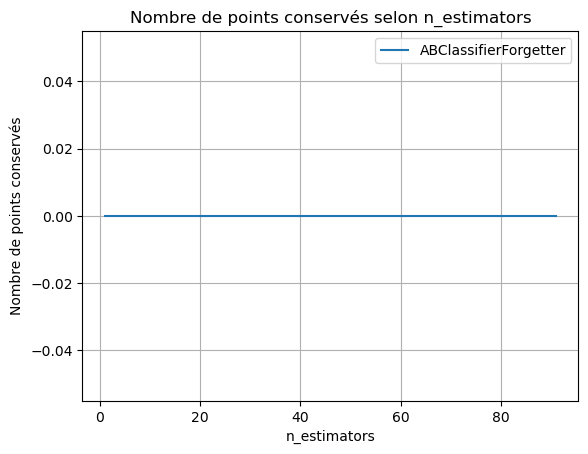

In [5]:
def plot_compressed_length_by_n_estimators(lr=1, step=10, max=100):
    lengths = []
    
    x = range(1,max,step)
    
    for n in x:
        forg = ABClassifierForgetter(estimator=base_model, learning_rate=lr ,n_estimators=n)
        _, y = forg.fit_transform(X_train, y_train, compression_strategy)
        lengths.append(len(y))
        
    

    plt.plot(x, lengths, label="ABClassifierForgetter")
    plt.legend()
    plt.xlabel("n_estimators")
    plt.ylabel("Nombre de points conservés")
    plt.title("Nombre de points conservés selon n_estimators")
    plt.grid()
    plt.show()  
        
        
plot_compressed_length_by_n_estimators()

In [6]:
lr = 10
n_estimators = 50
# test compression 
forg = ABClassifierForgetter(estimator=base_model, learning_rate=lr ,n_estimators=n_estimators)
X, y = forg.fit_transform(X_train, y_train, compression_strategy)

print(len(X_train))
print(len(X))

455
85


c:\Users\Antoine\miniconda3\envs\ML\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ABClassifierForgetter was fitted with feature names
  warnings.warn(


In [7]:
# Get which points are removed
forg = ABClassifierForgetter(estimator=base_model, learning_rate=10 ,n_estimators=50)

forg.fit(X_train,y_train)
mask = forg.get_mask(compression_strategy)

c:\Users\Antoine\miniconda3\envs\ML\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ABClassifierForgetter was fitted with feature names
  warnings.warn(


c:\Users\Antoine\Desktop\CIA\BoostingProject\display_utils.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pc1[kept_points], pc2[kept_points], c=y_colors[kept_points], cmap='coolwarm')
c:\Users\Antoine\Desktop\CIA\BoostingProject\display_utils.py:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pc1[removed_points], pc2[removed_points], facecolors='none', edgecolors=y_colors[removed_points], cmap='coolwarm')


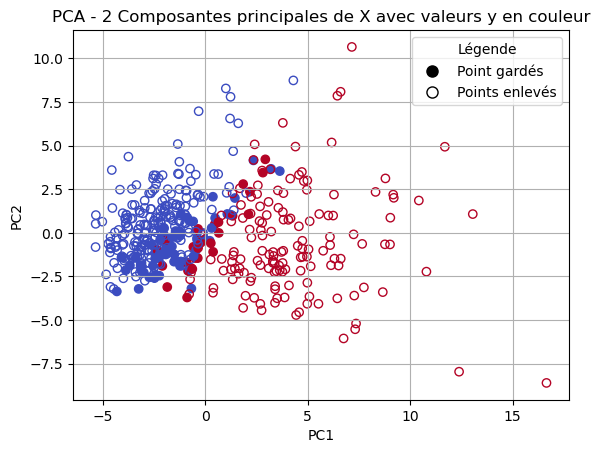

c:\Users\Antoine\Desktop\CIA\BoostingProject\display_utils.py:54: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pc1[kept_points], pc2[kept_points], c=y_colors[kept_points], cmap='coolwarm')


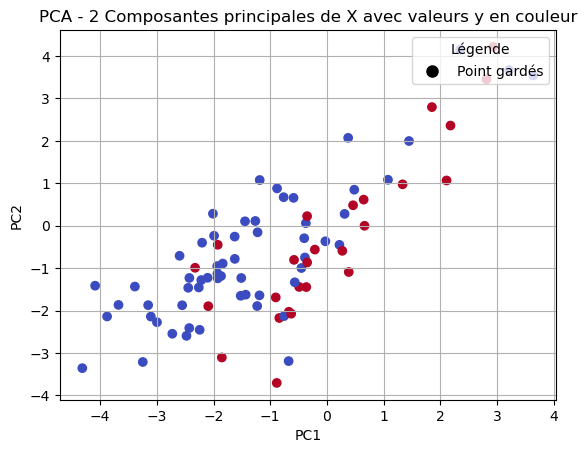

In [8]:
from display_utils import display_pca_and_labels, display_only_kept_points
display_pca_and_labels(X_train,y_train, mask)
display_only_kept_points(X_train,y_train, mask)

In [9]:

def get_compressed_scores(counts, predictive_model, X_train, y_train, X_test, y_test, score_function=accuracy_score):    
    def get_score(X, y):
        predictive_model.fit(X, y)
        y_pred = predictive_model.predict(X_test)
        return score_function(y_test, y_pred)
    
    x = []
    y = []
    x.append(len(X_train))       
    y.append(get_score(X_train, y_train))
    
    for i in range(max(counts)):
        mask = (counts > i)
        X_comp = X_train[mask]
        y_comp = y_train[mask]
        x.append(len(X_comp))       
        y.append(get_score(X_comp, y_comp))
        
    
    
    return x, y

In [10]:
base_model = DecisionTreeClassifier(max_depth=1)
comp_model = ABClassifierForgetter(estimator=base_model, learning_rate=10, n_estimators=50)
comp_model.fit(X_train, y_train)
compression_strategy = DropNForgetsClassification(n=1)
_ = comp_model.transform(X_train, compression_strategy)

counts = compression_strategy.get_counts()

predictive_model = RandomForestClassifier(n_estimators=21, max_depth=3)

x_c_score, y_c_score = get_compressed_scores(counts, predictive_model, X_train, y_train, X_test, y_test)


c:\Users\Antoine\miniconda3\envs\ML\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but ABClassifierForgetter was fitted with feature names
  warnings.warn(


In [11]:
print(counts)

[ 1 13  1  2  1  1  1  1  1  1  1  1  1  1  1  2 13 13  1  1 13  8  1  8
 13  1  1  1  1 13  1 13  1  1 13  1  1  1 13  1  1  1 13 13  8  1 13 15
  1 13 13 13 13  1  8  1  1 13  1  1 13  1 13  1  1  1  2 13  8 13  0 13
  1  1  1 13 13  1  1  1  1  1  1  8  1 13 13 13  1  1  1  1  1 13  1  1
  1  2 13  1 13  8  1  1  1  1  1  1  8 13  1 13  1 13  1 13  1  1  1 13
  1  1  1 13 13  1  7  1  1  1  1  1  1 12 13 13  1  1 15  1  1  2 13 13
  8  1  1 13  1  1  1  1  8  1  8  1  7  1  8  1  8  1  1  1  8 13 13  2
  1 13 13  1  1 13 13 13  1 13  1  1  1  1  1  2 13  0  1 13  1 15 13  1
  8  1  8  1  1  1 13  1  1  8  1 13 13 13  1  1  1 13  1 13 13 13 13  8
 13  8  1  1  1  2  1  1  1 13 13  1 13  1  0  1 13  1  1  1  1 13  1 13
 13  1 13  1  1  1  1  1 13  1 15  1  1 13  1  1  1 13  1  1  1 13  8  1
  1  1  1  1  1  1  1  1  1  8  1  1 13 13 13  1 13 15  1  1  8  8  1 13
  1  1  7  1 13  1 13  1  1  1  2  1  1  1  1 13 13 13  0  1  1  2  1  1
 13  1  1  1  0 13  1 13 13  1  1 13  1 13 13  1  1

In [12]:
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

def get_baseline(predictive_model, X_train, y_train, X_test, y_test, score_function=accuracy_score, N_repeats=20, step=5):
    m = len(X_train)
    
    def get_score(X, y):
        predictive_model.fit(X, y)
        y_pred = predictive_model.predict(X_test)
        return score_function(y_test, y_pred)
    
    all_baselines = []
    for i in range(N_repeats):
        X_train_shuf, y_train_shuf = shuffle(X_train, y_train, random_state=i)
        
        accuracy_baseline = []
        for j in range(1, m, step):
            score = get_score(X_train_shuf[:j], y_train_shuf[:j])
            accuracy_baseline.append(score)
        all_baselines.append(accuracy_baseline)
        
    x = range(1, m, step)
    all_baselines = np.array(all_baselines)
    y = np.mean(all_baselines, axis=0)
    return x, y
    

In [13]:
x, baseline = get_baseline(predictive_model, X_train, y_train, X_test, y_test)

KeyboardInterrupt: 

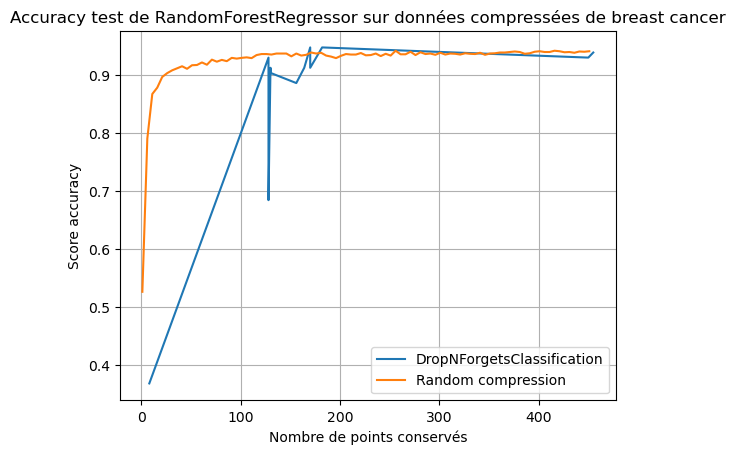

In [ ]:
plt.plot(x_c_score, y_c_score, label="DropNForgetsClassification")
plt.plot(x, baseline, label="Random compression")

plt.legend()
plt.xlabel("Nombre de points conservés")
plt.ylabel("Score accuracy")
plt.title("Accuracy test de RandomForestRegressor sur données compressées de breast cancer")
plt.grid()
plt.show()  
